In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import os
import time
from itertools import product
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import base
import numpy as np

In [3]:
#INPUTFOLDER = '../input/competitive-data-science-predict-future-sales/'

# Import data
#df = pd.read_csv('/content/drive/My Drive/Colab/processed_data.csv')
#processed_df = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/processed_data.csv')
processed_df = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/processed_all.csv')
df_shop = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/shop_sales.csv')
item_categories = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/item_categories.csv')
items           = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/items.csv')
sales           = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/sales_train.csv')
shops           = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/shops.csv')
test            = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/test.csv')
print(processed_df.head())
print(test.head())
#item_categories = pd.read_csv(os.path.join(INPUTFOLDER, 'item_categories.csv'))
#items           = pd.read_csv(os.path.join(INPUTFOLDER, 'items.csv'))
#sales           = pd.read_csv(os.path.join(INPUTFOLDER, 'sales_train.csv'))
#shops           = pd.read_csv(os.path.join(INPUTFOLDER, 'shops.csv'))
#test            = pd.read_csv(os.path.join(INPUTFOLDER, 'test.csv'))

   date_block_num  shop_id  item_id  year  month  month_sale  month_price  \
0               0        2       27  2013      1           1       2499.0   
1               1        2       27  2013      2           0        498.0   
2               2        2       27  2013      3           0        498.0   
3               3        2       27  2013      4           0        498.0   
4               4        2       27  2013      5           0        498.0   

   month_price_sd  
0        0.929672  
1       -0.227109  
2       -0.227109  
3       -0.227109  
4       -0.227109  
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [4]:
np.sort(sales['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [5]:
np.sort(processed_df['shop_id'].unique())

array([ 2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59])

In [6]:
print(sales.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


In [7]:
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"',"shop_name"] = 'СергиевПосад ТЦ "7Я"'
shops["shop_city"] = shops.shop_name.str.split(' ').map(lambda x: x[0])
shops["shop_category"] = shops.shop_name.str.split(" ").map(lambda x: x[1])
shops.loc[shops.shop_city == "!Якутск", "shop_city"] = "Якутск" 
print(shops.head())

                        shop_name  shop_id shop_city  shop_category
0   !Якутск Орджоникидзе, 56 фран        0    Якутск  Орджоникидзе,
1   !Якутск ТЦ "Центральный" фран        1    Якутск             ТЦ
2                Адыгея ТЦ "Мега"        2    Адыгея             ТЦ
3  Балашиха ТРК "Октябрь-Киномир"        3  Балашиха            ТРК
4        Волжский ТЦ "Волга Молл"        4  Волжский             ТЦ


In [8]:
shops["shop_city"] = LabelEncoder().fit_transform(shops.shop_city)
shops["shop_category"] = LabelEncoder().fit_transform(shops.shop_category)
shops = shops[["shop_id", "shop_category", "shop_city"]]
shops.head()

print(shops.shop_city)
print(LabelEncoder().fit_transform(shops.shop_city))

0     29
1     29
2      0
3      1
4      2
5      3
6      4
7      4
8      4
9      5
10     6
11     6
12     7
13     8
14     8
15     9
16    10
17    11
18    11
19    12
20    13
21    13
22    13
23    13
24    13
25    13
26    13
27    13
28    13
29    13
30    13
31    13
32    13
33    14
34    15
35    15
36    16
37    16
38    17
39    18
40    18
41    18
42    19
43    19
44    20
45    20
46    21
47    22
48    23
49    24
50    24
51    24
52    25
53    25
54    26
55    27
56    28
57    29
58    29
59    30
Name: shop_city, dtype: int64
[29 29  0  1  2  3  4  4  4  5  6  6  7  8  8  9 10 11 11 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 14 15 15 16 16 17 18 18 18 19 19 20 20 21 22
 23 24 24 24 25 25 26 27 28 29 29 30]


In [9]:
item_categories["category_type"] = item_categories.item_category_name.apply(lambda x: x.split(" ")[0]).astype(str)
# The category_type "Gamming" and "accesoires" becomes "Games"
item_categories.loc[(item_categories.category_type=="Игровые")|(item_categories.category_type=="Аксессуары"), "category_type"] = "Игры"
item_categories["split"] = item_categories.item_category_name.apply(lambda x: x.split("-"))
item_categories["category_subtype"] = item_categories.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [10]:
item_categories["category_type"] = LabelEncoder().fit_transform(item_categories.category_type)
item_categories["category_subtype"] = LabelEncoder().fit_transform(item_categories.category_subtype)
item_categories = item_categories[["item_category_id", "category_type", "category_subtype"]]
item_categories.head()

,item_category_id,category_type,category_subtype
0,0,0,29
1,1,3,9
2,2,3,10
3,3,3,11
4,4,3,13


In [11]:
#d = {'year': [[2013]*12, [2014]*12, [2015]*10, 'month': [range(1,12),range(1,12),range(1,10)], 'date_block_number':[range(1,33)] }
#date_block = pd.DataFrame(d)
#date_block
#date_block = df_shop[['year','month']].drop_duplicates()
#date_block['date_block_num'] = range(0,36)
#date_block = date_block[:-2]
#date_block

In [12]:
processed_df.head()

,date_block_num,shop_id,item_id,year,month,month_sale,month_price,month_price_sd
0,0,2,27,2013,1,1,2499.0,0.929672
1,1,2,27,2013,2,0,498.0,-0.227109
2,2,2,27,2013,3,0,498.0,-0.227109
3,3,2,27,2013,4,0,498.0,-0.227109
4,4,2,27,2013,5,0,498.0,-0.227109


In [13]:
processed_df.head()
sales_processed = processed_df[["date_block_num","shop_id","item_id",'year','month']].copy()
sales_processed["item_cnt_month"] = processed_df["month_sale"].copy()
sales_processed["price_cnt_month_sd"] = processed_df["month_price_sd"].copy()
test['date_block_num'] = 34
test['item_cnt_month'] = 0
test['year'] = 2015
test['month'] = 11
print(sales_processed.head())
print(test.head())
del test['ID']

df = sales_processed.append(test)
df

   date_block_num  shop_id  item_id  year  month  item_cnt_month  \
0               0        2       27  2013      1               1   
1               1        2       27  2013      2               0   
2               2        2       27  2013      3               0   
3               3        2       27  2013      4               0   
4               4        2       27  2013      5               0   

   price_cnt_month_sd  
0            0.929672  
1           -0.227109  
2           -0.227109  
3           -0.227109  
4           -0.227109  
   ID  shop_id  item_id  date_block_num  item_cnt_month  year  month
0   0        5     5037              34               0  2015     11
1   1        5     5320              34               0  2015     11
2   2        5     5233              34               0  2015     11
3   3        5     5232              34               0  2015     11
4   4        5     5268              34               0  2015     11


,date_block_num,shop_id,item_id,year,month,item_cnt_month,price_cnt_month_sd
0,0,2,27,2013,1,1,0.929672
1,1,2,27,2013,2,0,-0.227109
2,2,2,27,2013,3,0,-0.227109
3,3,2,27,2013,4,0,-0.227109
4,4,2,27,2013,5,0,-0.227109
...,...,...,...,...,...,...,...
214195,34,45,18454,2015,11,0,NaN
214196,34,45,16188,2015,11,0,NaN
214197,34,45,15757,2015,11,0,NaN
214198,34,45,19648,2015,11,0,NaN


In [14]:
np.sort(sales['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [15]:
np.sort(processed_df['shop_id'].unique())

array([ 2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59])

In [16]:
df[df.date_block_num<34].item_cnt_month.value_counts()

0      12633764
1       1060053
2        266172
3        103481
4         53491
         ...   
530           1
441           1
579           1
423           1
303           1
Name: item_cnt_month, Length: 439, dtype: int64

In [17]:
df.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/df.csv', index=False)
df.head()

,date_block_num,shop_id,item_id,year,month,item_cnt_month,price_cnt_month_sd
0,0,2,27,2013,1,1,0.929672
1,1,2,27,2013,2,0,-0.227109
2,2,2,27,2013,3,0,-0.227109
3,3,2,27,2013,4,0,-0.227109
4,4,2,27,2013,5,0,-0.227109


In [76]:
df            = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/df.csv')

In [18]:
def lag_feature(df, lags, col):
    print(col)
    for i in lags:
        shifted = df[["date_block_num", "shop_id", "item_id", col]].copy()
        shifted.columns = ["date_block_num", "shop_id", "item_id", col+"_lag_"+str(i)]
        shifted.date_block_num += i
        df = df.merge(shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)
    return df

In [19]:
#matrix = lag_feature(matrix, [1, 2, 3, 4, 5, 12], 'item_cnt_month')
matrix = lag_feature(df, [1, 2, 3, 4, 5], 'item_cnt_month')
matrix

item_cnt_month


,date_block_num,shop_id,item_id,year,month,item_cnt_month,price_cnt_month_sd,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,item_cnt_month_lag_5
0,0,2,27,2013,1,1,0.929672,0.0,0.0,0.0,0.0,0.0
1,1,2,27,2013,2,0,-0.227109,1.0,0.0,0.0,0.0,0.0
2,2,2,27,2013,3,0,-0.227109,0.0,1.0,0.0,0.0,0.0
3,3,2,27,2013,4,0,-0.227109,0.0,0.0,1.0,0.0,0.0
4,4,2,27,2013,5,0,-0.227109,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14456183,34,45,18454,2015,11,0,0.000000,1.0,0.0,0.0,0.0,0.0
14456184,34,45,16188,2015,11,0,0.000000,0.0,0.0,0.0,0.0,0.0
14456185,34,45,15757,2015,11,0,0.000000,0.0,0.0,0.0,0.0,0.0
14456186,34,45,19648,2015,11,0,0.000000,0.0,0.0,0.0,0.0,0.0


In [20]:
#Merge features from shops, items and item_categories:
matrix = matrix.merge(shops, how='left', on='shop_id')
matrix = matrix.merge(items[['item_id','item_category_id']], how='left', on='item_id')
matrix = matrix.merge(item_categories, how='left', on='item_category_id')

# Add month
matrix['month'] = matrix.date_block_num%12
# Clip counts
matrix['item_cnt_month'] = matrix['item_cnt_month'].clip(0,20)#.clip(0, 20)

In [21]:
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix['month'] = matrix['month'].astype(np.int8)
matrix['item_cnt_month'] = matrix['item_cnt_month'].astype(np.int32)
matrix['shop_category'] = matrix['shop_category'].astype(np.int8)
matrix['shop_city'] = matrix['shop_city'].astype(np.int8)
matrix['item_category_id'] = matrix['item_category_id'].astype(np.int8)
matrix['category_type'] = matrix['category_type'].astype(np.int8)
matrix['category_subtype'] = matrix['category_subtype'].astype(np.int8)
matrix

,date_block_num,shop_id,item_id,year,month,item_cnt_month,price_cnt_month_sd,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,item_cnt_month_lag_5,shop_category,shop_city,item_category_id,category_type,category_subtype
0,0,2,27,2013,0,1,0.929672,0.0,0.0,0.0,0.0,0.0,8,0,19,3,10
1,1,2,27,2013,1,0,-0.227109,1.0,0.0,0.0,0.0,0.0,8,0,19,3,10
2,2,2,27,2013,2,0,-0.227109,0.0,1.0,0.0,0.0,0.0,8,0,19,3,10
3,3,2,27,2013,3,0,-0.227109,0.0,0.0,1.0,0.0,0.0,8,0,19,3,10
4,4,2,27,2013,4,0,-0.227109,0.0,0.0,0.0,1.0,0.0,8,0,19,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456183,34,45,18454,2015,10,0,0.000000,1.0,0.0,0.0,0.0,0.0,8,20,55,7,2
14456184,34,45,16188,2015,10,0,0.000000,0.0,0.0,0.0,0.0,0.0,8,20,64,8,42
14456185,34,45,15757,2015,10,0,0.000000,0.0,0.0,0.0,0.0,0.0,8,20,55,7,2
14456186,34,45,19648,2015,10,0,0.000000,0.0,0.0,0.0,0.0,0.0,8,20,40,5,4


In [22]:
# cnt_block_shop
gb = matrix.groupby(['shop_id', 'date_block_num'],as_index=False)\
          .agg({'item_cnt_month':'sum'})\
          .rename(columns={'item_cnt_month':'cnt_block_shop'}, inplace=False)
matrix = matrix.merge(gb, how='left', on=['shop_id', 'date_block_num']).fillna(0)
matrix = lag_feature(matrix, [1, 2, 3, 4, 5], 'cnt_block_shop')
matrix.drop('cnt_block_shop', axis=1, inplace=True)
# cnt_block_item
gb = matrix.groupby(['item_id', 'date_block_num'],as_index=False)\
          .agg({'item_cnt_month':'sum'})\
          .rename(columns={'item_cnt_month':'cnt_block_item'}, inplace=False)
matrix = matrix.merge(gb, how='left', on=['item_id', 'date_block_num']).fillna(0)
matrix = lag_feature(matrix, [1, 2, 3, 4, 5], 'cnt_block_item')
matrix.drop('cnt_block_item', axis=1, inplace=True)
# cnt_block_category
gb = matrix.groupby(['category_type', 'date_block_num'],as_index=False)\
          .agg({'item_cnt_month':'sum'})\
          .rename(columns={'item_cnt_month':'cnt_block_category'}, inplace=False)
matrix = matrix.merge(gb, how='left', on=['category_type', 'date_block_num']).fillna(0)
matrix = lag_feature(matrix, [1, 2, 3, 4, 5], 'cnt_block_category')
matrix.drop('cnt_block_category', axis=1, inplace=True)

cnt_block_shop
cnt_block_item
cnt_block_category


In [23]:
#encode 
from sklearn.preprocessing import StandardScaler

def standard_mean_enc(df, col):
    mean_enc = df.groupby(col).agg({'item_cnt_month': 'mean'})
    scaler = StandardScaler().fit(mean_enc)
    return {v: k[0] for v, k in enumerate(scaler.transform(mean_enc))}

cols_to_mean_encode = ['shop_category', 'shop_city', 'item_category_id', 'category_type', 'category_subtype']


for col in cols_to_mean_encode:
    # Train on the train data
    mean_enc = standard_mean_enc(matrix[matrix.date_block_num < 33].copy(), col) # X_train, y_train
    # Apply to Train, Validation and Test
    matrix[col] = matrix[col].map(mean_enc)
matrix

,date_block_num,shop_id,item_id,year,month,item_cnt_month,price_cnt_month_sd,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,...,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5
0,0,2,27,2013,0,1,0.929672,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,27,2013,1,0,-0.227109,1.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,49644.0,0.0,0.0,0.0,0.0
2,2,2,27,2013,2,0,-0.227109,0.0,1.0,0.0,...,3.0,7.0,0.0,0.0,0.0,48432.0,49644.0,0.0,0.0,0.0
3,3,2,27,2013,3,0,-0.227109,0.0,0.0,1.0,...,4.0,3.0,7.0,0.0,0.0,55872.0,48432.0,49644.0,0.0,0.0
4,4,2,27,2013,4,0,-0.227109,0.0,0.0,0.0,...,1.0,4.0,3.0,7.0,0.0,37036.0,55872.0,48432.0,49644.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456183,34,45,18454,2015,10,0,0.000000,1.0,0.0,0.0,...,2.0,1.0,3.0,12.0,19.0,6824.0,6113.0,6970.0,7621.0,7164.0
14456184,34,45,16188,2015,10,0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14456185,34,45,15757,2015,10,0,0.000000,0.0,0.0,0.0,...,5.0,3.0,4.0,4.0,8.0,6824.0,6113.0,6970.0,7621.0,7164.0
14456186,34,45,19648,2015,10,0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
matrix.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/matrix_process.csv', index=False)

In [55]:
matrix = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/matrix_process.csv')

In [56]:
for col in matrix.columns:
    print(col)

date_block_num
shop_id
item_id
year
month
item_cnt_month
price_cnt_month_sd
item_cnt_month_lag_1
item_cnt_month_lag_2
item_cnt_month_lag_3
item_cnt_month_lag_4
item_cnt_month_lag_5
shop_category
shop_city
item_category_id
category_type
category_subtype
cnt_block_shop_lag_1
cnt_block_shop_lag_2
cnt_block_shop_lag_3
cnt_block_shop_lag_4
cnt_block_shop_lag_5
cnt_block_item_lag_1
cnt_block_item_lag_2
cnt_block_item_lag_3
cnt_block_item_lag_4
cnt_block_item_lag_5
cnt_block_category_lag_1
cnt_block_category_lag_2
cnt_block_category_lag_3
cnt_block_category_lag_4
cnt_block_category_lag_5


In [57]:
def lag_feature(df, lags, col):
    print(col)
    for i in lags:
        shifted = df[["date_block_num", "shop_id", "item_id", col]].copy()
        shifted.columns = ["date_block_num", "shop_id", "item_id", col+"_lag_"+str(i)]
        shifted.date_block_num += i
        df = df.merge(shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)
    return df

matrix = lag_feature(matrix, [1, 2, 3, 4, 5], 'price_cnt_month_sd')
matrix.drop('price_cnt_month_sd', axis=1, inplace=True)

price_cnt_month_sd


In [58]:
matrix

,date_block_num,shop_id,item_id,year,month,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,...,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,price_cnt_month_sd_lag_1,price_cnt_month_sd_lag_2,price_cnt_month_sd_lag_3,price_cnt_month_sd_lag_4,price_cnt_month_sd_lag_5
0,0,2,27,2013,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,27,2013,1,0,1.0,0.0,0.0,0.0,...,49644.0,0.0,0.0,0.0,0.0,0.929672,0.000000,0.000000,0.000000,0.000000
2,2,2,27,2013,2,0,0.0,1.0,0.0,0.0,...,48432.0,49644.0,0.0,0.0,0.0,-0.227109,0.929672,0.000000,0.000000,0.000000
3,3,2,27,2013,3,0,0.0,0.0,1.0,0.0,...,55872.0,48432.0,49644.0,0.0,0.0,-0.227109,-0.227109,0.929672,0.000000,0.000000
4,4,2,27,2013,4,0,0.0,0.0,0.0,1.0,...,37036.0,55872.0,48432.0,49644.0,0.0,-0.227109,-0.227109,-0.227109,0.929672,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456183,34,45,18454,2015,10,0,1.0,0.0,0.0,0.0,...,6824.0,6113.0,6970.0,7621.0,7164.0,-0.457772,-0.457772,-0.457772,-0.457772,-0.457772
14456184,34,45,16188,2015,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
14456185,34,45,15757,2015,10,0,0.0,0.0,0.0,0.0,...,6824.0,6113.0,6970.0,7621.0,7164.0,-0.399962,-0.399962,-0.399962,-0.399962,-0.399962
14456186,34,45,19648,2015,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
def standard_mean_enc(df, col):
    mean_enc = df.groupby(col).agg({'item_cnt_month': 'mean'})
    scaler = StandardScaler().fit(mean_enc)
    return {v: k[0] for v, k in enumerate(scaler.transform(mean_enc))}

cols_to_mean_encode = ['shop_id', 'item_id']

for col in cols_to_mean_encode:
    # Train on the train data
    mean_enc = standard_mean_enc(matrix[matrix.date_block_num < 33].copy(), col) # X_train, y_train
    # Apply to Train, Validation and Test
    matrix[col] = matrix[col].map(mean_enc)
matrix['shop_id']=matrix['shop_id'].fillna(0)
matrix['item_id']=matrix['item_id'].fillna(0)

In [60]:
matrix

,date_block_num,shop_id,item_id,year,month,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,...,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,price_cnt_month_sd_lag_1,price_cnt_month_sd_lag_2,price_cnt_month_sd_lag_3,price_cnt_month_sd_lag_4,price_cnt_month_sd_lag_5
0,0,-0.334121,-0.253421,2013,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,-0.334121,-0.253421,2013,1,0,1.0,0.0,0.0,0.0,...,49644.0,0.0,0.0,0.0,0.0,0.929672,0.000000,0.000000,0.000000,0.000000
2,2,-0.334121,-0.253421,2013,2,0,0.0,1.0,0.0,0.0,...,48432.0,49644.0,0.0,0.0,0.0,-0.227109,0.929672,0.000000,0.000000,0.000000
3,3,-0.334121,-0.253421,2013,3,0,0.0,0.0,1.0,0.0,...,55872.0,48432.0,49644.0,0.0,0.0,-0.227109,-0.227109,0.929672,0.000000,0.000000
4,4,-0.334121,-0.253421,2013,4,0,0.0,0.0,0.0,1.0,...,37036.0,55872.0,48432.0,49644.0,0.0,-0.227109,-0.227109,-0.227109,0.929672,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456183,34,-0.354222,-0.264904,2015,10,0,1.0,0.0,0.0,0.0,...,6824.0,6113.0,6970.0,7621.0,7164.0,-0.457772,-0.457772,-0.457772,-0.457772,-0.457772
14456184,34,-0.354222,0.624991,2015,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
14456185,34,-0.354222,-0.110141,2015,10,0,0.0,0.0,0.0,0.0,...,6824.0,6113.0,6970.0,7621.0,7164.0,-0.399962,-0.399962,-0.399962,-0.399962,-0.399962
14456186,34,-0.354222,-0.169824,2015,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
matrix[matrix['shop_id'].isna()]
matrix[matrix['item_id'].isna()]

,date_block_num,shop_id,item_id,year,month,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,...,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,price_cnt_month_sd_lag_1,price_cnt_month_sd_lag_2,price_cnt_month_sd_lag_3,price_cnt_month_sd_lag_4,price_cnt_month_sd_lag_5


In [62]:
for col in matrix.columns:
    print(col)

date_block_num
shop_id
item_id
year
month
item_cnt_month
item_cnt_month_lag_1
item_cnt_month_lag_2
item_cnt_month_lag_3
item_cnt_month_lag_4
item_cnt_month_lag_5
shop_category
shop_city
item_category_id
category_type
category_subtype
cnt_block_shop_lag_1
cnt_block_shop_lag_2
cnt_block_shop_lag_3
cnt_block_shop_lag_4
cnt_block_shop_lag_5
cnt_block_item_lag_1
cnt_block_item_lag_2
cnt_block_item_lag_3
cnt_block_item_lag_4
cnt_block_item_lag_5
cnt_block_category_lag_1
cnt_block_category_lag_2
cnt_block_category_lag_3
cnt_block_category_lag_4
cnt_block_category_lag_5
price_cnt_month_sd_lag_1
price_cnt_month_sd_lag_2
price_cnt_month_sd_lag_3
price_cnt_month_sd_lag_4
price_cnt_month_sd_lag_5


In [88]:
matrix = matrix[matrix.date_block_num>=5] 
matrix.reset_index(drop=True, inplace=True)
matrix

,date_block_num,shop_id,item_id,year,month,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,...,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,price_cnt_month_sd_lag_1,price_cnt_month_sd_lag_2,price_cnt_month_sd_lag_3,price_cnt_month_sd_lag_4,price_cnt_month_sd_lag_5
0,5,-0.334121,-0.253421,2013,5,0,0.0,0.0,0.0,0.0,...,36831.0,37036.0,55872.0,48432.0,49644.0,-0.227109,-0.227109,-0.227109,-0.227109,0.929672
1,6,-0.334121,-0.253421,2013,6,0,0.0,0.0,0.0,0.0,...,42133.0,36831.0,37036.0,55872.0,48432.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
2,7,-0.334121,-0.253421,2013,7,0,0.0,0.0,0.0,0.0,...,37472.0,42133.0,36831.0,37036.0,55872.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
3,8,-0.334121,-0.253421,2013,8,0,0.0,0.0,0.0,0.0,...,46305.0,37472.0,42133.0,36831.0,37036.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
4,9,-0.334121,-0.253421,2013,9,0,0.0,0.0,0.0,0.0,...,48116.0,46305.0,37472.0,42133.0,36831.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12361773,34,-0.354222,-0.264904,2015,10,0,1.0,0.0,0.0,0.0,...,6824.0,6113.0,6970.0,7621.0,7164.0,-0.457772,-0.457772,-0.457772,-0.457772,-0.457772
12361774,34,-0.354222,0.624991,2015,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12361775,34,-0.354222,-0.110141,2015,10,0,0.0,0.0,0.0,0.0,...,6824.0,6113.0,6970.0,7621.0,7164.0,-0.399962,-0.399962,-0.399962,-0.399962,-0.399962
12361776,34,-0.354222,-0.169824,2015,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
X_train = matrix[matrix.date_block_num < 33].drop(['item_cnt_month'], axis=1)
y_train = matrix[matrix.date_block_num < 33]['item_cnt_month']
X_val = matrix[matrix.date_block_num == 33].drop(['item_cnt_month'], axis=1)
y_val =  matrix[matrix.date_block_num == 33]['item_cnt_month']
X_test = matrix[matrix.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [90]:
X_val.shape

(418882, 35)

(0,)

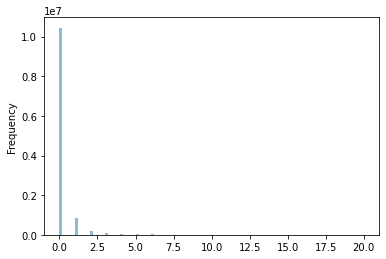

In [92]:
ax = y_train.plot.hist(bins=100, alpha=0.5)
y_train.describe()
y_train.value_counts().tail(50)
y_train[y_train>20].shape

In [93]:
X_train.drop('year', axis=1, inplace=True)
X_val.drop('year', axis=1, inplace=True)
X_test.drop('year', axis=1, inplace=True)

In [94]:
X_train.drop('date_block_num', axis=1, inplace=True)
X_val.drop('date_block_num', axis=1, inplace=True)
X_test.drop('date_block_num', axis=1, inplace=True)

In [102]:
for col in X_train.columns:
    print(col)

shop_id
item_id
month
item_cnt_month_lag_1
item_cnt_month_lag_2
item_cnt_month_lag_3
item_cnt_month_lag_4
item_cnt_month_lag_5
shop_category
shop_city
item_category_id
category_type
category_subtype
cnt_block_shop_lag_1
cnt_block_shop_lag_2
cnt_block_shop_lag_3
cnt_block_shop_lag_4
cnt_block_shop_lag_5
cnt_block_item_lag_1
cnt_block_item_lag_2
cnt_block_item_lag_3
cnt_block_item_lag_4
cnt_block_item_lag_5
cnt_block_category_lag_1
cnt_block_category_lag_2
cnt_block_category_lag_3
cnt_block_category_lag_4
cnt_block_category_lag_5
price_cnt_month_sd_lag_1
price_cnt_month_sd_lag_2
price_cnt_month_sd_lag_3
price_cnt_month_sd_lag_4
price_cnt_month_sd_lag_5


In [95]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [78]:
X_train.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/X_train_zero.csv', index=False)
X_val.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/X_val_zero.csv', index=False)
X_test.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/X_test_zero.csv', index=False)
y_val.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/y_val_zero.csv', index=False)
y_train.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/y_train_zero.csv', index=False)

In [101]:
X_train.shape
X_train
#X_train.drop(['price_date_block_x','price_date_block_y'], axis=1, inplace=True)
#X_val.drop(['price_date_block_x','price_date_block_y'], axis=1, inplace=True)
#X_test.drop(['price_date_block_x','price_date_block_y'], axis=1, inplace=True)

,shop_id,item_id,month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4,item_cnt_month_lag_5,shop_category,shop_city,...,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,price_cnt_month_sd_lag_1,price_cnt_month_sd_lag_2,price_cnt_month_sd_lag_3,price_cnt_month_sd_lag_4,price_cnt_month_sd_lag_5
0,-0.334121,-0.253421,5,0.0,0.0,0.0,0.0,1.0,0.048645,-0.369877,...,36831.0,37036.0,55872.0,48432.0,49644.0,-0.227109,-0.227109,-0.227109,-0.227109,0.929672
1,-0.334121,-0.253421,6,0.0,0.0,0.0,0.0,0.0,0.048645,-0.369877,...,42133.0,36831.0,37036.0,55872.0,48432.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
2,-0.334121,-0.253421,7,0.0,0.0,0.0,0.0,0.0,0.048645,-0.369877,...,37472.0,42133.0,36831.0,37036.0,55872.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
3,-0.334121,-0.253421,8,0.0,0.0,0.0,0.0,0.0,0.048645,-0.369877,...,46305.0,37472.0,42133.0,36831.0,37036.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
4,-0.334121,-0.253421,9,0.0,0.0,0.0,0.0,0.0,0.048645,-0.369877,...,48116.0,46305.0,37472.0,42133.0,36831.0,-0.227109,-0.227109,-0.227109,-0.227109,-0.227109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11728691,0.000000,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.048645,-0.232377,...,1683.0,1689.0,1626.0,1559.0,1867.0,-0.342151,-0.342151,-0.342151,-0.342151,-0.342151
11728692,0.000000,0.000000,5,0.0,0.0,0.0,0.0,0.0,0.048645,-0.232377,...,1757.0,1683.0,1689.0,1626.0,1559.0,-0.342151,-0.342151,-0.342151,-0.342151,-0.342151
11728693,0.000000,0.000000,6,0.0,0.0,0.0,0.0,0.0,0.048645,-0.232377,...,1989.0,1757.0,1683.0,1689.0,1626.0,-0.342151,-0.342151,-0.342151,-0.342151,-0.342151
11728694,0.000000,0.000000,7,0.0,0.0,0.0,0.0,0.0,0.048645,-0.232377,...,2404.0,1989.0,1757.0,1683.0,1689.0,-0.342151,-0.342151,-0.342151,-0.342151,-0.342151


In [97]:
splits = []
for block in [27, 28, 29, 30, 31, 32]:
    train_idxs = matrix[matrix.date_block_num < block].index.values
    test_idxs = matrix[matrix.date_block_num == block].index.values
    splits.append((train_idxs, test_idxs))
splits

[(array([       0,        1,        2, ..., 12147568, 12147569, 12147570]),
  array([      22,       51,       80, ..., 12147513, 12147542, 12147571])),
 (array([       0,        1,        2, ..., 12147569, 12147570, 12147571]),
  array([      23,       52,       81, ..., 12147514, 12147543, 12147572])),
 (array([       0,        1,        2, ..., 12147570, 12147571, 12147572]),
  array([      24,       53,       82, ..., 12147515, 12147544, 12147573])),
 (array([       0,        1,        2, ..., 12147571, 12147572, 12147573]),
  array([      25,       54,       83, ..., 12147516, 12147545, 12147574])),
 (array([       0,        1,        2, ..., 12147572, 12147573, 12147574]),
  array([      26,       55,       84, ..., 12147517, 12147546, 12147575])),
 (array([       0,        1,        2, ..., 12147573, 12147574, 12147575]),
  array([      27,       56,       85, ..., 12147518, 12147547, 12147576]))]

In [98]:
import sys
!{sys.executable} -m pip install xgboost

In [100]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat_val_lr = lr.predict(X_val).clip(0,20)
print('Validation RMSE:', mean_squared_error(y_val, yhat_val_lr, squared=False)) #Validation RMSE: 0.7831883611059035
yhat_test_lr = lr.predict(X_test).clip(0,20)

Validation RMSE: 0.7831883611059035


In [117]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

hyper_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9], 
                'gamma': [0, 0.5, 1, 1.5, 2, 5], 
                'subsample': [0.6, 0.7, 0.8, 0.9, 1], 
                'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                'learning_rate': [0.01, 0.1, 0.2, 0.3],
                'max_bin' : [256, 512, 1024],
                'max_bin' : [256, 512, 1024]
               }

xgbr  = XGBRegressor(seed = 9999, tree_method = "hist", objective ="reg:tweedie") 

clf = RandomizedSearchCV(estimator = xgbr, 
                   param_distributions = hyper_params,
                   n_iter = 4, #
                   scoring = 'neg_root_mean_squared_error',
                   #cv = splits,
                   verbose=3)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", -clf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_bin=512, max_depth=5, subsample=0.7;, score=-0.742 total time=  34.2s
[CV 2/5] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_bin=512, max_depth=5, subsample=0.7;, score=-0.800 total time=  32.4s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_bin=512, max_depth=5, subsample=0.7;, score=-0.922 total time=  31.2s
[CV 4/5] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_bin=512, max_depth=5, subsample=0.7;, score=-0.770 total time=  31.2s
[CV 5/5] END colsample_bytree=1, gamma=0, learning_rate=0.2, max_bin=512, max_depth=5, subsample=0.7;, score=-0.831 total time=  33.0s
[CV 1/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.3, max_bin=1024, max_depth=8, subsample=0.8;, score=-0.741 total time=  38.9s
[CV 2/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.3, max_bin=1024, max_depth=8, subsample=0.8;, score=-0.771 total ti

In [114]:
from xgboost import XGBRegressor

ts = time.time()

xgb = XGBRegressor(seed = 999, 
    tree_method = "hist", 
    subsample = 0.8,
    max_depth = 7,
    learning_rate = 0.2,
    gamma = 1.5,
    colsample_bytree = 0.9,
    max_bin=1024,
    objective ="reg:tweedie"
    )

xgb.fit(
    X_train,y_train,
    eval_metric="rmse",
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True,
    early_stopping_rounds = 10
    )

print('Training took: {0}s'.format(time.time()-ts))
#yhat_val_xgb = xgb.predict(X_val).clip(0, 20)
yhat_val_xgb = xgb.predict(X_val).clip(0,20)

print('Valdation RMSE:', mean_squared_error(y_val, yhat_val_xgb, squared=False)) #Valdation RMSE: 0.9409594444278176
yhat_test_xgb = xgb.predict(X_test) #.clip(0, 20)
# with lag 12 0.9474961863580649
# without lag 12 0.9470205495612632
# without lag 12 and normalize price 0.945634745369864
# without lag 12 and normalize price and tweedie 0.9229676921954488 /0.7057634805777209/
# without lag 12 and normalize price and tweedie Valdation RMSE: 0.9342000924291926
# without lag 12 and normalize price and tweedie Valdation RMSE with zero: 0.7289640904963066

[0]	validation_0-rmse:1.05266	validation_1-rmse:0.88044
[1]	validation_0-rmse:1.02162	validation_1-rmse:0.84295
[2]	validation_0-rmse:0.99129	validation_1-rmse:0.81901
[3]	validation_0-rmse:0.96562	validation_1-rmse:0.80049
[4]	validation_0-rmse:0.94333	validation_1-rmse:0.78551
[5]	validation_0-rmse:0.92166	validation_1-rmse:0.77529
[6]	validation_0-rmse:0.90124	validation_1-rmse:0.76562
[7]	validation_0-rmse:0.88220	validation_1-rmse:0.75502
[8]	validation_0-rmse:0.86508	validation_1-rmse:0.74592
[9]	validation_0-rmse:0.85096	validation_1-rmse:0.73964
[10]	validation_0-rmse:0.83869	validation_1-rmse:0.73499
[11]	validation_0-rmse:0.82888	validation_1-rmse:0.73378
[12]	validation_0-rmse:0.82107	validation_1-rmse:0.73222
[13]	validation_0-rmse:0.81502	validation_1-rmse:0.73070
[14]	validation_0-rmse:0.80937	validation_1-rmse:0.72919
[15]	validation_0-rmse:0.80619	validation_1-rmse:0.73008
[16]	validation_0-rmse:0.80297	validation_1-rmse:0.72914
[17]	validation_0-rmse:0.80083	validation

In [116]:
yhat_val_xgb.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [105]:
ts = time.time()

xgbpos = XGBRegressor(seed = 999, 
    tree_method = "hist", 
    subsample = 1,
    max_depth = 9,
    learning_rate = 0.1,
    gamma = 1,
    colsample_bytree = 0.6,
    max_bin=256,
    objective ="count:poisson"
    )
xgbpos2 = XGBRegressor(seed = 999, 
    tree_method = "hist", 
    subsample = 0.7,
    max_depth = 5,
    learning_rate = 0.2,
    gamma = 5,
    colsample_bytree = 0.5,
    max_bin=256,
    objective ="count:poisson"
    )

xgbpos.fit(
    X_train,y_train,
    eval_metric="rmse",
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True,
    early_stopping_rounds = 10
    )

print('Training took: {0}s'.format(time.time()-ts))
#yhat_val_xgb = xgb.predict(X_val).clip(0, 20)
yhat_val_xgbpos = xgbpos.predict(X_val).clip(0,20)
print('Valdation RMSE:', mean_squared_error(y_val, yhat_val_xgbpos, squared=False)) #Valdation RMSE: 0.7214701857143355
yhat_test_xgbpos = xgbpos.predict(X_test) #.clip(0, 20)

[0]	validation_0-rmse:1.09802	validation_1-rmse:0.92665
[1]	validation_0-rmse:1.08821	validation_1-rmse:0.91686
[2]	validation_0-rmse:1.08157	validation_1-rmse:0.90730
[3]	validation_0-rmse:1.06584	validation_1-rmse:0.89885
[4]	validation_0-rmse:1.05874	validation_1-rmse:0.89091
[5]	validation_0-rmse:1.04888	validation_1-rmse:0.88332
[6]	validation_0-rmse:1.04420	validation_1-rmse:0.87770
[7]	validation_0-rmse:1.03913	validation_1-rmse:0.87095
[8]	validation_0-rmse:1.03466	validation_1-rmse:0.86491
[9]	validation_0-rmse:1.02917	validation_1-rmse:0.85851
[10]	validation_0-rmse:1.02425	validation_1-rmse:0.85322
[11]	validation_0-rmse:1.01614	validation_1-rmse:0.84712
[12]	validation_0-rmse:1.00982	validation_1-rmse:0.84181
[13]	validation_0-rmse:1.00402	validation_1-rmse:0.83707
[14]	validation_0-rmse:0.99770	validation_1-rmse:0.83205
[15]	validation_0-rmse:0.98960	validation_1-rmse:0.82696
[16]	validation_0-rmse:0.98108	validation_1-rmse:0.82215
[17]	validation_0-rmse:0.97368	validation

In [118]:
ts = time.time()

xgblr = XGBRegressor(seed = 999, 
    tree_method = "hist", 
    subsample = 1,
    max_depth = 9,
    learning_rate = 0.1,
    gamma = 1,
    colsample_bytree = 0.6,
    max_bin=256
    ) 

xgblr2 = XGBRegressor(seed = 999, 
    tree_method = "hist", 
    subsample = 0.8,
    max_depth = 4,
    learning_rate = 0.2,
    gamma = 1,
    colsample_bytree = 0.8,
    max_bin=512
    ) 

xgblr.fit(
    X_train,y_train,
    eval_metric="rmse",
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True,
    early_stopping_rounds = 10
    )

print('Training took: {0}s'.format(time.time()-ts))
#yhat_val_xgb = xgb.predict(X_val).clip(0, 20)
yhat_val_xgblr = xgblr.predict(X_val).clip(0,20)
print('Valdation RMSE:', mean_squared_error(y_val, yhat_val_xgblr, squared=False)) #Valdation RMSE: 0.9409594444278176
yhat_test_xgblr = xgblr.predict(X_test) #.clip(0, 20)

[0]	validation_0-rmse:1.07163	validation_1-rmse:0.90709
[1]	validation_0-rmse:1.02255	validation_1-rmse:0.87480
[2]	validation_0-rmse:0.98539	validation_1-rmse:0.84782
[3]	validation_0-rmse:0.95856	validation_1-rmse:0.82486
[4]	validation_0-rmse:0.93609	validation_1-rmse:0.80567
[5]	validation_0-rmse:0.91212	validation_1-rmse:0.79087
[6]	validation_0-rmse:0.90157	validation_1-rmse:0.78087
[7]	validation_0-rmse:0.88291	validation_1-rmse:0.77035
[8]	validation_0-rmse:0.86892	validation_1-rmse:0.76214
[9]	validation_0-rmse:0.85544	validation_1-rmse:0.75465
[10]	validation_0-rmse:0.84823	validation_1-rmse:0.74931
[11]	validation_0-rmse:0.83598	validation_1-rmse:0.74452
[12]	validation_0-rmse:0.82751	validation_1-rmse:0.74080
[13]	validation_0-rmse:0.82064	validation_1-rmse:0.73826
[14]	validation_0-rmse:0.81401	validation_1-rmse:0.73545
[15]	validation_0-rmse:0.80887	validation_1-rmse:0.73122
[16]	validation_0-rmse:0.80348	validation_1-rmse:0.72971
[17]	validation_0-rmse:0.79930	validation

In [119]:
#matrix = pd.DataFrame(np.vstack(matrix), columns=['date_block_num', 'shop_id', 'item_id'], dtype=np.int16)
#np.vstack((yhat_val_lr, yhat_val_xgb, yhat_val_xgbpos, yhat_val_xgblr)).T
matrix_org = pd.read_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/matrix_process.csv')
matrix_org = matrix_org[matrix_org.date_block_num>=5] 
matrix_org.reset_index(drop=True, inplace=True)
matrix_org

,date_block_num,shop_id,item_id,year,month,item_cnt_month,price_cnt_month_sd,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,...,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5
0,5,2,27,2013,5,0,-0.227109,0.0,0.0,0.0,...,2.0,1.0,4.0,3.0,7.0,36831.0,37036.0,55872.0,48432.0,49644.0
1,6,2,27,2013,6,0,-0.227109,0.0,0.0,0.0,...,2.0,2.0,1.0,4.0,3.0,42133.0,36831.0,37036.0,55872.0,48432.0
2,7,2,27,2013,7,0,-0.227109,0.0,0.0,0.0,...,3.0,2.0,2.0,1.0,4.0,37472.0,42133.0,36831.0,37036.0,55872.0
3,8,2,27,2013,8,0,-0.227109,0.0,0.0,0.0,...,1.0,3.0,2.0,2.0,1.0,46305.0,37472.0,42133.0,36831.0,37036.0
4,9,2,27,2013,9,0,-0.227109,0.0,0.0,0.0,...,1.0,1.0,3.0,2.0,2.0,48116.0,46305.0,37472.0,42133.0,36831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12361773,34,45,18454,2015,10,0,0.000000,1.0,0.0,0.0,...,2.0,1.0,3.0,12.0,19.0,6824.0,6113.0,6970.0,7621.0,7164.0
12361774,34,45,16188,2015,10,0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12361775,34,45,15757,2015,10,0,0.000000,0.0,0.0,0.0,...,5.0,3.0,4.0,4.0,8.0,6824.0,6113.0,6970.0,7621.0,7164.0
12361776,34,45,19648,2015,10,0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
X_val_id = matrix_org[matrix_org.date_block_num==33][["shop_id","item_id"]].copy()
X_val_id['yhat_val_xgb']= np.vstack(yhat_val_xgb)
X_val_id['yhat_val_xgbpos']= np.vstack(yhat_val_xgbpos)
X_val_id['yhat_val_xgblr']= np.vstack(yhat_val_xgblr)
X_val_id['yhat_val_lr']= np.vstack(yhat_val_lr)
X_val_id['y_val']= np.vstack(y_val)
X_val_id

,shop_id,item_id,yhat_val_xgb,yhat_val_xgbpos,yhat_val_xgblr,yhat_val_lr,y_val
28,2,27,0.040293,0.051058,0.074197,0.100943,0
57,2,30,0.061712,0.057997,0.082712,0.045874,0
86,2,31,0.123994,0.136663,0.171566,0.088797,1
115,2,32,0.145546,0.202734,0.263723,0.254456,0
144,2,33,0.227326,0.230969,0.271123,0.270973,0
...,...,...,...,...,...,...,...
12147461,59,22154,0.102394,0.118435,0.123383,0.063728,0
12147490,59,22155,0.038419,0.051737,0.057919,0.023902,0
12147519,59,22162,0.082979,0.149377,0.169637,0.153275,0
12147548,59,22164,0.115079,0.146757,0.169363,0.150827,0


In [121]:
X_val_id.to_csv('/Users/katewang/Desktop/2021 Fall/STA 560/project/predict-future-sales/leaf_xgb_update.csv', index=False)

In [91]:
yhat_test_xgb[yhat_test_xgb>20]

array([20.30778 , 20.164259], dtype=float32)

In [68]:
y_val

8782573    1
8782574    3
8782575    1
8782576    1
8782577    1
          ..
9020652    1
9020653    1
9020654    1
9020655    1
9020656    1
Name: item_cnt_month, Length: 238084, dtype: int64

In [51]:
import pickle
pickle.dump(xgb, open("xgboost_tweedie.pickle.dat", "wb"))
#loaded_model = pickle.load(open("xgboost_base.pickle.dat", "rb"))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

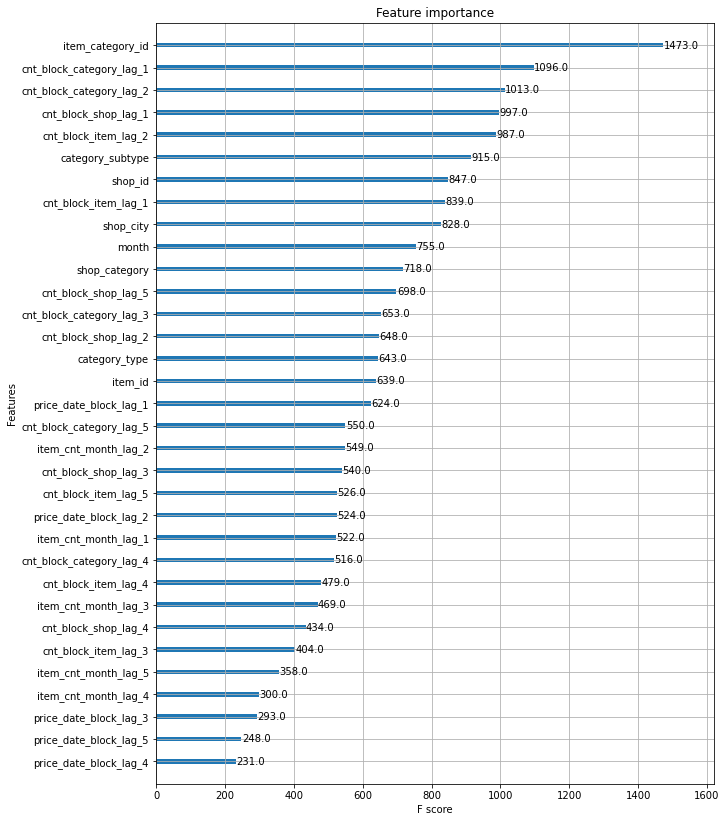

In [27]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

#plot_features(xgb, (10,14))
plot_features(xgb, (10,14))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

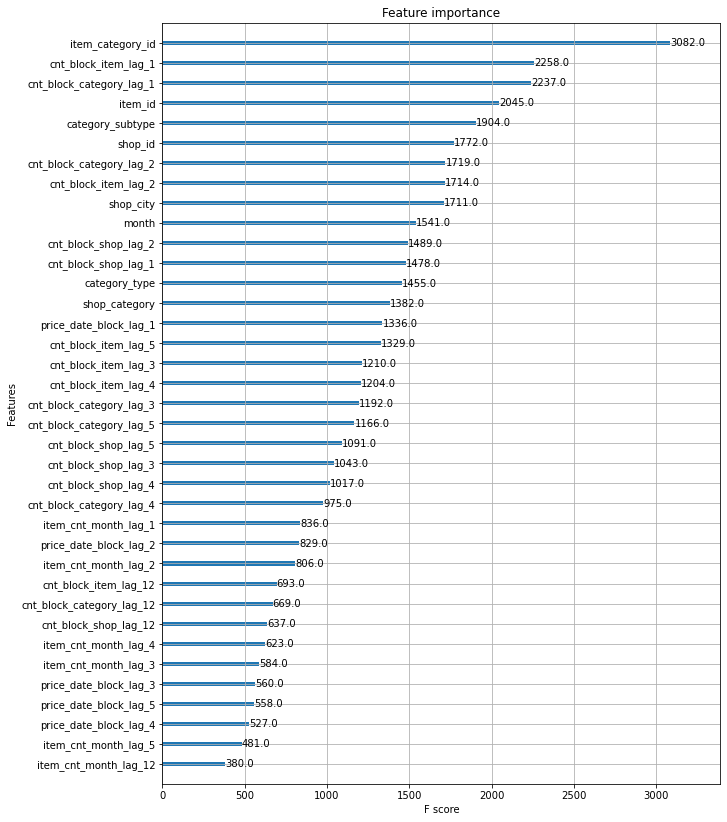

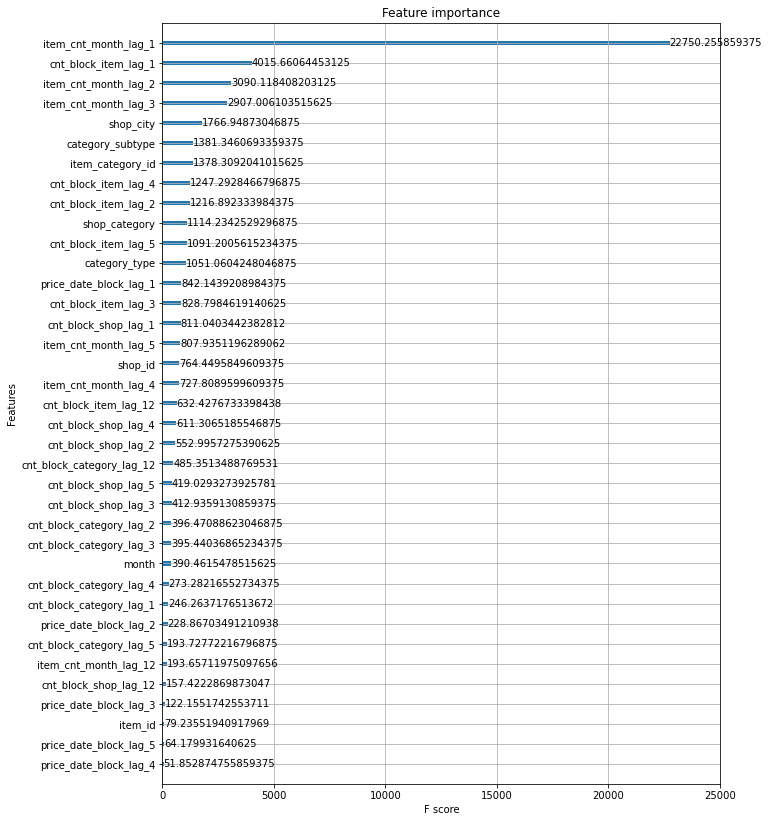

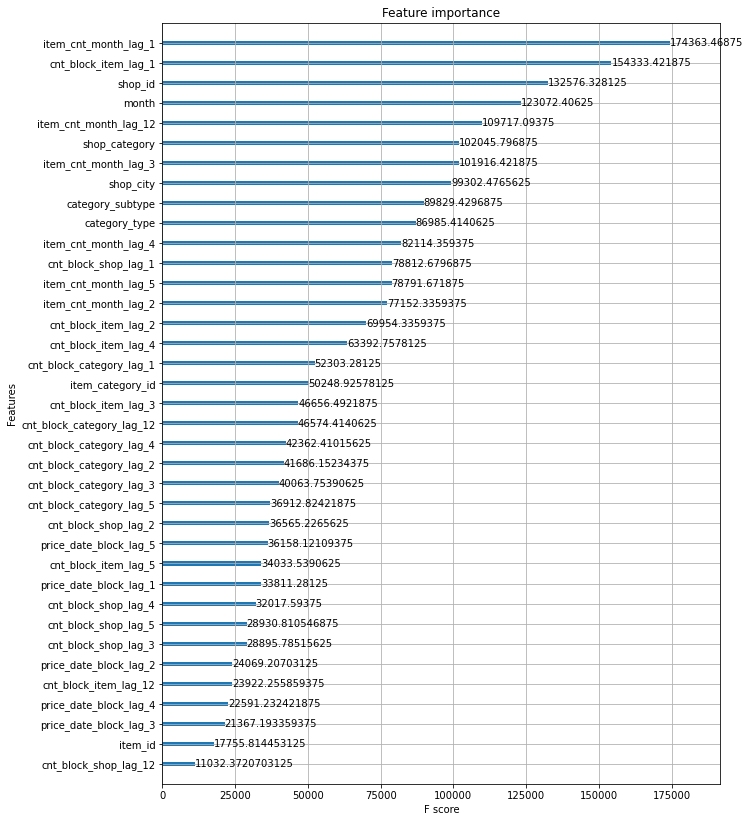

In [37]:
from xgboost import plot_importance

def plot_features(booster, figsize, important='weight'):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, importance_type=important)

plot_features(xgb, (10,14)) #weight # of item used 
plot_features(xgb, (10,14), 'gain') # improve rmse
plot_features(xgb, (10,14), 'cover')

In [61]:
y_train_meta = matrix[matrix.date_block_num.isin([ 27, 28, 29, 30, 31, 32])].item_cnt_month

In [68]:
X_train_meta = [[],[]]
for block in [27, 28, 29, 30, 31, 32]:
    print('Block:', block)
    # X and y Train for blocks from 12 to block
    X_train_block = matrix[matrix.date_block_num < block].drop(['date_block_num', 'item_cnt_month'], axis=1)
    y_train_block = matrix[matrix.date_block_num < block].item_cnt_month
    # X and y Test for block
    X_val_block = matrix[matrix.date_block_num == block].drop(['date_block_num', 'item_cnt_month'], axis=1)
    #y_test_block = matrix[matrix.date_block_num == block].item_cnt_month
    
    # Fit first model 
    print(' LR fitting ...')
    lr.fit(X_train_block, y_train_block)
    print(' LR fitting ... done')
    # Append prediction results on X_val_block to X_train_meta (first column)
    X_train_meta[0] += list(lr.predict(X_val_block).clip(0, 20))
    
    # Fit second model
    print(' XGB fitting ...')
    xgb.fit(
        X_train_block, y_train_block,
        eval_metric="rmse",
        eval_set=[(X_train_block, y_train_block)],
        #eval_set=[(X_train_block, y_train_block), (X_val_block, y_test_block)],
        verbose=0,
        early_stopping_rounds = 10
    )
    print(' XGB fitting ... done')

    # Append prediction results on X_val_block to X_train_meta (second column)
    X_train_meta[1] += list(xgb.predict(X_val_block).clip(0, 20))
# Turn list into dataframe
X_train_meta = pd.DataFrame({'yhat_lr': X_train_meta[0], 'yhat_xgb': X_train_meta[1]})

Block: 27
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
Block: 28
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
Block: 29
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
Block: 30
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
Block: 31
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
Block: 32
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done


In [69]:
## leaf
stacking = LinearRegression()
stacking.fit(X_train_meta, y_train_meta)

#Squared: If True returns MSE value, if False returns RMSE value.
yhat_train_meta = stacking.predict(X_train_meta).clip(0, 20)
print('Meta Training RMSE:', mean_squared_error(y_train_meta, yhat_train_meta, squared=False))
# Meta Training RMSE: 0.7959949995252207

yhat_val_meta = stacking.predict(np.vstack((yhat_val_lr,yhat_val_xgb )).T).clip(0, 20)
print('Meta Validation RMSE:', mean_squared_error(y_val, yhat_val_meta, squared=False))
# Meta Validation RMSE: 0.9313002364522425

yhat_test_meta = stacking.predict(np.vstack((yhat_test_lr, yhat_test_xgb)).T).clip(0, 20)

Meta Training RMSE: 0.804787135242981
Meta Validation RMSE: 0.9309919001677672


In [59]:
X_train_meta = [[],[],[],[]]
for block in [27, 28, 29, 30, 31, 32]:
    print('Block:', block)
    # X and y Train for blocks from 12 to block
    X_train_block = matrix[matrix.date_block_num < block].drop(['date_block_num', 'item_cnt_month'], axis=1)
    y_train_block = matrix[matrix.date_block_num < block].item_cnt_month
    # X and y Test for block
    X_val_block = matrix[matrix.date_block_num == block].drop(['date_block_num', 'item_cnt_month'], axis=1)
    #y_test_block = matrix[matrix.date_block_num == block].item_cnt_month
    
    # Fit first model 
    print(' LR fitting ...')
    lr.fit(X_train_block, y_train_block)
    print(' LR fitting ... done')
    # Append prediction results on X_val_block to X_train_meta (first column)
    X_train_meta[0] += list(lr.predict(X_val_block).clip(0, 20))
    
    # Fit second model
    print(' XGB fitting ...')
    xgb.fit(
        X_train_block, y_train_block,
        eval_metric="rmse",
        eval_set=[(X_train_block, y_train_block)],
        #eval_set=[(X_train_block, y_train_block), (X_val_block, y_test_block)],
        verbose=0,
        early_stopping_rounds = 10
    )
    print(' XGB fitting ... done')
    # Append prediction results on X_val_block to X_train_meta (first column)
    X_train_meta[1] += list(xgb.predict(X_val_block).clip(0, 20))
    
    
    # Fit third model
    print(' XGBlr fitting ...')
    xgbpos.fit(
        X_train_block, y_train_block,
        eval_metric="rmse",
        eval_set=[(X_train_block, y_train_block)],
        #eval_set=[(X_train_block, y_train_block), (X_val_block, y_test_block)],
        verbose=0,
        early_stopping_rounds = 10
    )
    print(' XGBlr fitting ... done')
    # Append prediction results on X_val_block to X_train_meta (first column)
    X_train_meta[2] += list(xgbpos.predict(X_val_block).clip(0, 20))
    
    
    # Fit fourth model
    print(' XGBpos fitting ...')
    xgblr.fit(
        X_train_block, y_train_block,
        eval_metric="rmse",
        eval_set=[(X_train_block, y_train_block)],
        #eval_set=[(X_train_block, y_train_block), (X_val_block, y_test_block)],
        verbose=0,
        early_stopping_rounds = 10
    )
    print(' XGBpos fitting ... done')
 
    # Append prediction results on X_val_block to X_train_meta (second column)
    X_train_meta[3] += list(xgblr.predict(X_val_block).clip(0, 20))
# Turn list into dataframe
X_train_meta = pd.DataFrame({'yhat_lr': X_train_meta[0], 'yhat_xgb': X_train_meta[1], 'yhat_xgbpos': X_train_meta[2], 'yhat_xgblr': X_train_meta[3]})

Block: 27
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
 XGBlr fitting ...
 XGBlr fitting ... done
 XGBpos fitting ...
 XGBpos fitting ... done
Block: 28
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
 XGBlr fitting ...
 XGBlr fitting ... done
 XGBpos fitting ...
 XGBpos fitting ... done
Block: 29
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
 XGBlr fitting ...
 XGBlr fitting ... done
 XGBpos fitting ...
 XGBpos fitting ... done
Block: 30
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
 XGBlr fitting ...
 XGBlr fitting ... done
 XGBpos fitting ...
 XGBpos fitting ... done
Block: 31
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
 XGBlr fitting ...
 XGBlr fitting ... done
 XGBpos fitting ...
 XGBpos fitting ... done
Block: 32
 LR fitting ...
 LR fitting ... done
 XGB fitting ...
 XGB fitting ... done
 XGBlr fitting ...
 XGBlr fitting ... done
 

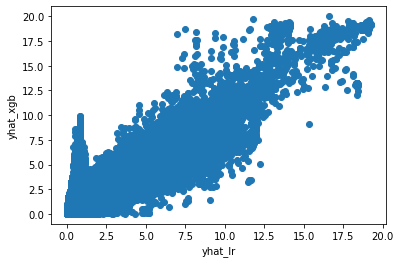

In [34]:
plt.scatter(X_train_meta.yhat_lr, X_train_meta.yhat_xgb)
plt.xlabel("yhat_lr")
plt.ylabel("yhat_xgb")
plt.show()

In [67]:
## leaf
stacking = LinearRegression()
stacking.fit(X_train_meta, y_train_meta)

#Squared: If True returns MSE value, if False returns RMSE value.
yhat_train_meta = stacking.predict(X_train_meta).clip(0, 20)
print('Meta Training RMSE:', mean_squared_error(y_train_meta, yhat_train_meta, squared=False))
# Meta Training RMSE: 0.7959949995252207

yhat_val_meta = stacking.predict(np.vstack((yhat_val_lr,yhat_val_xgb, yhat_val_xgbpos, yhat_val_xgblr)).T).clip(0, 20)
print('Meta Validation RMSE:', mean_squared_error(y_val, yhat_val_meta, squared=False))
# Meta Validation RMSE: 0.9313002364522425

yhat_test_meta = stacking.predict(np.vstack((yhat_test_lr, yhat_test_xgb, yhat_test_xgbpos, yhat_test_xgblr)).T).clip(0, 20)

Meta Training RMSE: 0.8032692185786658
Meta Validation RMSE: 0.9334028242998748


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [ ]:
ts = time.time()

xgbsta = XGBRegressor(seed = 999, 
    tree_method = "hist", 
    subsample = 1,
    max_depth = 9,
    learning_rate = 0.1,
    gamma = 1,
    colsample_bytree = 0.6,
    max_bin=256
    )

xgb.fit(
    X_train,y_train,
    eval_metric="rmse",
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True,
    early_stopping_rounds = 10
    )

print('Training took: {0}s'.format(time.time()-ts))
#yhat_val_xgb = xgb.predict(X_val).clip(0, 20)
yhat_val_xgb = xgb.predict(X_val).clip(0,20)

print('Valdation RMSE:', mean_squared_error(y_val, yhat_val_xgb, squared=False)) #Valdation RMSE: 0.9409594444278176
yhat_test_xgb = xgb.predict(X_test) #.clip(0, 20)

In [78]:
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": yhat_test_meta
})
submission.to_csv('submission_stacking_pos.csv', index=False)
submission

,ID,item_cnt_month
0,0,0.517818
1,1,0.220163
2,2,0.938613
3,3,0.334947
4,4,3.769909
...,...,...
214195,214195,0.149391
214196,214196,0.078988
214197,214197,0.060771
214198,214198,0.050525


In [80]:
#import bartpy
#from bartpy.sklearnmodel import SklearnModel
import sys
!{sys.executable} -m pip install bartpy

In [122]:
from bartpy.extensions.baseestimator import ResidualBART
model = ResidualBART(base_estimator=LinearModel())
model.fit(X, y)

ModuleNotFoundError: No module named 'bartpy.extensions'

In [86]:
#import bartpy
from bartpy.sklearnmodel import SklearnModel
model = SklearnModel() # Use default parameters
model.fit(X_train, y_trian) # Fit the model
yhat_train_bart = model.predict() # Make predictions on the train set
yhat_val_bart = model.predict(X_val) # Make predictions on new data
print('Valdation RMSE:', mean_squared_error(y_val, yhat_val_bart, squared=False))

ModuleNotFoundError: No module named 'bartpy.samplers'